In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

import numpy as np
import pandas as pd

In [56]:
import json
from pprint import pprint

with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/data/diffusion-prediction-data/reddit-traversal-2') as data_file:    
    data = json.load(data_file)
    
result_act = pd.read_json(data["result_act"]).sort_index()
result_user = pd.read_json(data["result_user"]).sort_index()
innovations = pd.read_csv("/Users/danielkershaw/PycharmProjects/DiffusionSimulation/data/word-lists/reddit_innovations.csv")
innovations["created_at"] = pd.to_datetime(innovations['created_at'])

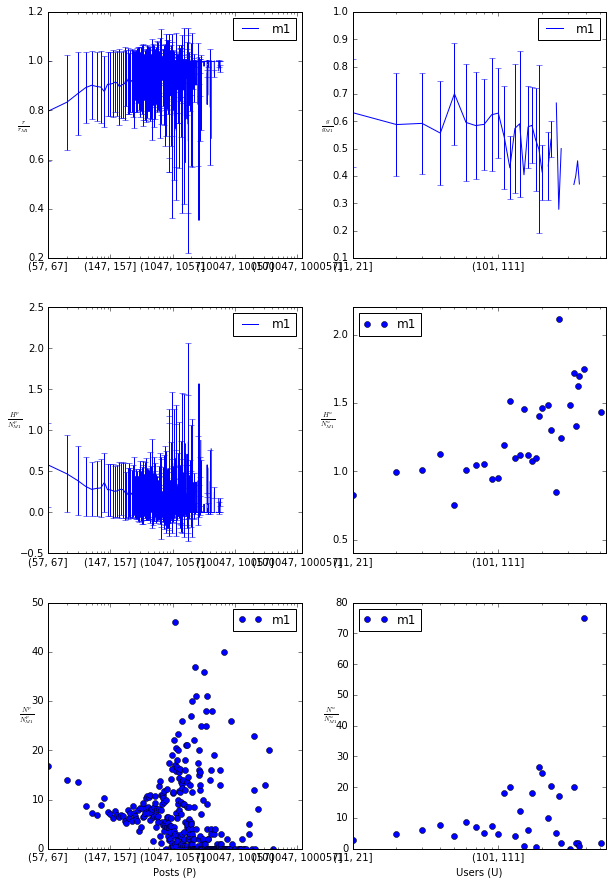

In [57]:
binned_act = result_act.groupby(pd.cut(result_act["depth"], np.arange(min(result_act["depth"]), max(result_act["depth"]), 10))).mean()
binned_user = result_user.groupby(pd.cut(result_user["depth"], np.arange(min(result_user["depth"]), max(result_user["depth"]), 10))).mean()

binned_act_err = result_act.groupby(pd.cut(result_act["depth"], np.arange(min(result_act["depth"]), max(result_act["depth"]), 10))).std()
binned_user_err = result_user.groupby(pd.cut(result_user["depth"], np.arange(min(result_user["depth"]), max(result_user["depth"]), 10))).std()


fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10,15))

def ratio(n, w):
    if n == 0:
        return 0

    if w == 0:
        return 0

    return  n/w

def rowRatio(data):
    d = {
        "m1":ratio(data["m1"], data["m1"]),
        "m2":ratio(data["m2"], data["m1"]),
        "m3":ratio(data["m3"], data["m1"]),
        "m4":ratio(data["m4"], data["m1"])
    }
    return pd.Series(d)

usagedominance = binned_act[["usagedominance"]]
usagedominance.columns = ['m1']

usagedominance_err = binned_act_err[["usagedominance"]]
usagedominance_err.columns = ['m1']

plts = usagedominance.plot(yerr=usagedominance_err, ax=axes[0,0], style='-', logx = True)
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{r}{r_{M1}}$', rotation=0)

userusagedominance = binned_user[["userusagedominance"]]
userusagedominance.columns = ['m1']

userusagedominance_err = binned_user_err[["userusagedominance"]]
userusagedominance_err.columns = ['m1']
# userusagedominance = userusagedominance.apply(rowRatio,1)

plts = userusagedominance.plot(yerr=userusagedominance_err, ax=axes[0,1], style='-', logx = True)
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{g}{g_{M1}}$', rotation=0)

usageEntorpy = binned_act[["usageEntorpy"]]
usageEntorpy.columns = ['m1']
usageEntorpy_err = binned_act_err[["usageEntorpy"]]
usageEntorpy_err.columns = ['m1']

plts = usageEntorpy.plot(yerr=usageEntorpy_err, ax=axes[1,0], style='o', logx = True)
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{H^p}{N_{M1}^p}$', rotation=0)

userUsageEntorpy = binned_user[["userUsageEntorpy"]]
userUsageEntorpy.columns = ['m1']
# userUsageEntorpy = userUsageEntorpy.apply(rowRatio,1)

plts = userUsageEntorpy.plot(ax=axes[1,1], style='o', logx = True)
plts.set_xlabel('')
plts.set_ylabel(r'$\frac{H^u}{N_{M1}^u}$', rotation=0)

ActivateionExposure = binned_act[["ActivateionExposure"]]
ActivateionExposure.columns = ['m1']
# ActivateionExposure.loc[:, 'm1'] = ActivateionExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()

plts = ActivateionExposure.plot(ax=axes[2,0], style='o', logx = True)
plts.set_xlabel('Posts (P)')
plts.set_ylabel(r'$\frac{N^p}{N_{M1}^p}$', rotation=0)

UserExposure = binned_user[["UserExposure"]]
UserExposure.columns = ['m1']
# UserExposure.loc[:, 'm1'] = UserExposure.loc[:, 'm1'].rolling(window=100,center=False).mean()

plts = UserExposure.plot(ax=axes[2,1], style='o', logx = True)
plts.set_xlabel('Users (U)')
plts.set_ylabel(r'$\frac{N^u}{N_{M1}^u}$', rotation=0)

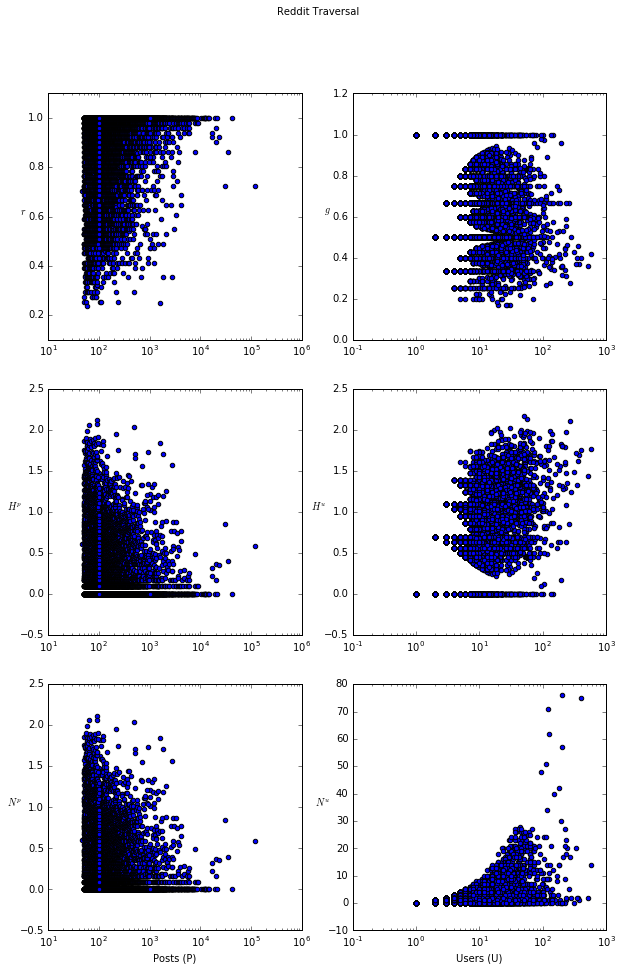

In [58]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
fig.suptitle('Reddit Traversal')

plts = result_act.plot(ax=axes[0,0], style='o', logx = True, y="usagedominance", x="depth", kind="scatter")
plts.set_xlabel('')
plts.set_ylabel(r'$r$', rotation=0)

plts = result_user.plot(ax=axes[0,1], style='o', logx = True, y="userusagedominance", x="depth", kind="scatter")
plts.set_xlabel('')
plts.set_ylabel(r'$g$', rotation=0)

plts = result_act.plot(ax=axes[1,0], style='o', logx = True, y="usageEntorpy", x="depth", kind="scatter")
plts.set_xlabel('')
plts.set_ylabel(r'$H^p$', rotation=0)

plts = result_user.plot(ax=axes[1,1], style='o', logx = True, y="userUsageEntorpy", x="depth", kind="scatter")
plts.set_xlabel('')
plts.set_ylabel(r'$H^u$', rotation=0)

plts = result_act.plot(ax=axes[2,0], style='o', logx = True, y="usageEntorpy", x="depth", kind="scatter")
plts.set_xlabel('Posts (P)')
plts.set_ylabel(r'$N^p$', rotation=0)


plts = result_user.plot(ax=axes[2,1], style='o', logx = True, y="UserExposure", x="depth", kind="scatter")
plts.set_xlabel('Users (U)')
plts.set_ylabel(r'$N^u$', rotation=0)